In [28]:
import pandas as pd
df = pd.read_csv('US_Accidents_June20.csv')

In [29]:
df.head(5)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [30]:
df.drop(columns=['Source', 'End_Lat', 'End_Lng']).head(1)

,ID,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Number,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night


Columns with >10% nan values

In [31]:
df.rename(columns={'Precipitation(in)': 'Precipitation_in', 'Wind_Chill(F)': 'Wind_Chill_f', 'Wind_Speed(mph)': 'Wind_Speed_mph', 'Visibility(mi)': 'Visibility_mi', 'Humidity(%)': 'Humidity_%', 'Temperature(F)': 'Temperature_f', 'Pressure(in)': 'Pressure_in', 'Distance(mi)': 'Distance_mi'}, inplace=True)

In [32]:
nandf = df.isna().sum() / len(df) * 100
nandf.sort_values(ascending=False)

End_Lng                  70.548896
End_Lat                  70.548896
Number                   64.402694
Precipitation_in         57.657793
Wind_Chill_f             53.171675
TMC                      29.451104
Wind_Speed_mph           12.938490
Weather_Condition         2.166941
Visibility_mi             2.158915
Humidity_%                1.983341
Temperature_f             1.870779
Wind_Direction            1.675595
Pressure_in               1.590441
Weather_Timestamp         1.233003
Airport_Code              0.192337
Timezone                  0.110428
Zipcode                   0.030424
Sunrise_Sunset            0.003273
Civil_Twilight            0.003273
Nautical_Twilight         0.003273
Astronomical_Twilight     0.003273
City                      0.003188
Description               0.000028
Country                   0.000000
Junction                  0.000000
Severity                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Turning_Loop        

In [33]:
df.dtypes

ID                        object
Source                    object
TMC                      float64
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance_mi              float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature_f            float64
Wind_Chill_f             float64
Humidity_%               float64
Pressure_in              float64
Visibility_mi            float64
Wind_Direction            object
Wind_Speed_mph           float64
Precipitat

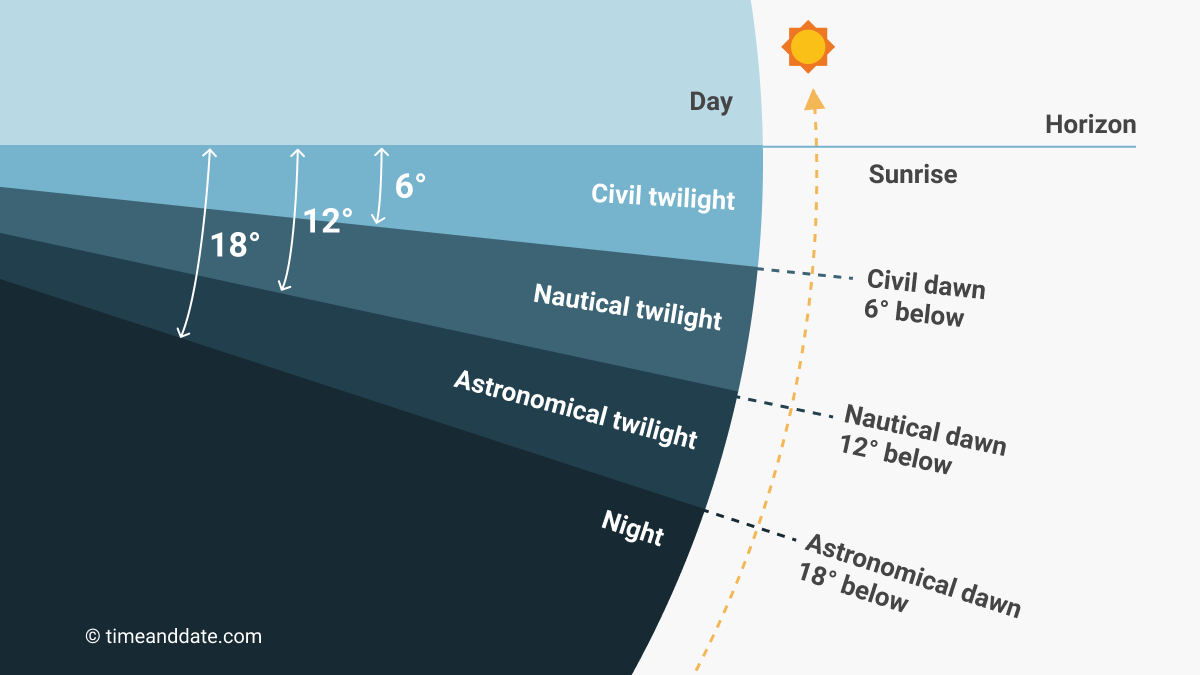

In [34]:
df[['Street','Number']]

,Street,Number
0,I-70 E,NaN
1,Brice Rd,2584.0
2,State Route 32,NaN
3,I-75 S,NaN
4,Miamisburg Centerville Rd,NaN
...,...,...
3513612,Pomona Fwy E,NaN
3513613,I-8 W,NaN
3513614,Garden Grove Fwy,NaN
3513615,San Diego Fwy S,NaN


In [35]:
df.loc[0]

ID                                                                     A-1
Source                                                            MapQuest
TMC                                                                  201.0
Severity                                                                 3
Start_Time                                             2016-02-08 05:46:00
End_Time                                               2016-02-08 11:00:00
Start_Lat                                                        39.865147
Start_Lng                                                       -84.058723
End_Lat                                                                NaN
End_Lng                                                                NaN
Distance_mi                                                           0.01
Description              Right lane blocked due to accident on I-70 Eas...
Number                                                                 NaN
Street                   

Convert 'Day' to 1 and 'Night' to 2

In [36]:
def daynight(x):
    if x == 'Day':
        return '1'
    if x == 'Night':
        return '0'
    
df['Sunrise_Sunset'] = df['Sunrise_Sunset'].apply(daynight)
df['Civil_Twilight'] = df['Civil_Twilight'].apply(daynight)
df['Nautical_Twilight'] = df['Nautical_Twilight'].apply(daynight)
df['Astronomical_Twilight'] = df['Astronomical_Twilight'].apply(daynight)

Convert Weather_Condition:rain to mm

In [37]:
df['Weather_Condition'].unique()

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Rain', 'Light Snow',
       'Haze', 'Scattered Clouds', 'Partly Cloudy', 'Clear', 'Snow',
       'Light Freezing Drizzle', 'Light Drizzle', 'Fog', 'Shallow Fog',
       'Heavy Rain', 'Light Freezing Rain', 'Cloudy', 'Drizzle', nan,
       'Light Rain Showers', 'Mist', 'Smoke', 'Patches of Fog',
       'Light Freezing Fog', 'Light Haze', 'Light Thunderstorms and Rain',
       'Thunderstorms and Rain', 'Fair', 'Volcanic Ash', 'Blowing Sand',
       'Blowing Dust / Windy', 'Widespread Dust', 'Fair / Windy',
       'Rain Showers', 'Mostly Cloudy / Windy', 'Light Rain / Windy',
       'Hail', 'Heavy Drizzle', 'Showers in the Vicinity', 'Thunderstorm',
       'Light Rain Shower', 'Light Rain with Thunder',
       'Partly Cloudy / Windy', 'Thunder in the Vicinity', 'T-Storm',
       'Heavy Thunderstorms and Rain', 'Thunder', 'Heavy T-Storm',
       'Funnel Cloud', 'Heavy T-Storm / Windy', 'Blowing Snow',
       'Light Thunderstorms and Snow',

In [38]:
import numpy as np
df['Weather_Condition_Value'] = np.where(df.Weather_Condition.str.startswith("Light Rain")|df.Weather_Condition.str.startswith("Light Drizzle"), "0.1",
                   np.where(df.Weather_Condition.str.startswith("Rain"), "0.2",
                   np.where(df.Weather_Condition.str.startswith("Heavy Rain"), "1.2", "")))

https://www.baranidesign.com/faq-articles/2020/1/19/rain-rate-intensity-classification

In [39]:
test = df
test['Precipitation_in'] = test['Precipitation_in'].fillna('d')
test[['Precipitation_in','Weather_Condition','Weather_Condition_Value']].head(5)

,Precipitation_in,Weather_Condition,Weather_Condition_Value
0,0.02,Light Rain,0.1
1,0.0,Light Rain,0.1
2,d,Overcast,
3,d,Mostly Cloudy,
4,d,Mostly Cloudy,


In [40]:
test['Precipitation_in'] = np.where(test['Precipitation_in'] == 'd', test['Weather_Condition_Value'], test['Precipitation_in'])
test[['Precipitation_in','Weather_Condition','Weather_Condition_Value']].head(5)

,Precipitation_in,Weather_Condition,Weather_Condition_Value
0,0.02,Light Rain,0.1
1,0.0,Light Rain,0.1
2,,Overcast,
3,,Mostly Cloudy,
4,,Mostly Cloudy,


In [41]:
test['Precipitation_in'] = np.where(test['Precipitation_in'] == '', np.nan, test['Precipitation_in'])
test[['Precipitation_in','Weather_Condition','Weather_Condition_Value']].head(5)

,Precipitation_in,Weather_Condition,Weather_Condition_Value
0,0.02,Light Rain,0.1
1,0.0,Light Rain,0.1
2,NaN,Overcast,
3,NaN,Mostly Cloudy,
4,NaN,Mostly Cloudy,


In [42]:
test.Precipitation_in.isna().sum() / len(test) * 100

55.11881346202503

In [43]:
test["Precipitation_in"] = df["Precipitation_in"].astype(float)
test[['Precipitation_in', 'Severity']].dtypes

Precipitation_in    float64
Severity              int64
dtype: object

In [44]:
test[['Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']] = test[['Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']].astype(float)
test[['Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']].dtypes

Sunrise_Sunset           float64
Civil_Twilight           float64
Nautical_Twilight        float64
Astronomical_Twilight    float64
dtype: object

In [45]:
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Weather_Condition_Value
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,0.0,0.0,0.0,0.0,0.1
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,0.0,0.0,0.0,1.0,0.1
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,True,False,0.0,0.0,1.0,1.0,
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,0.0,1.0,1.0,1.0,
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,True,False,1.0,1.0,1.0,1.0,


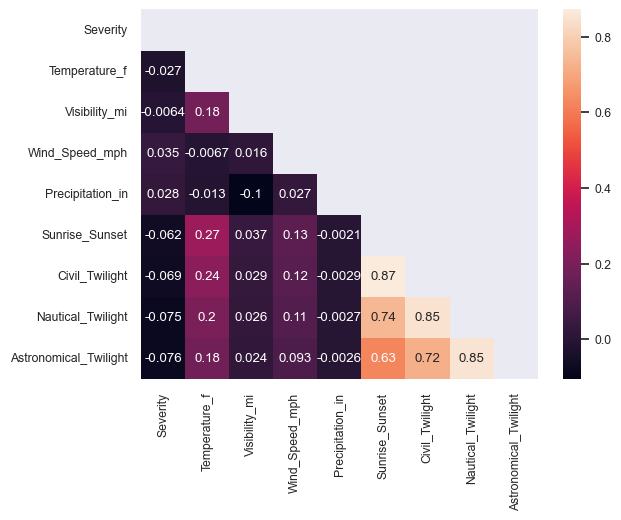

In [46]:
import seaborn as sb
import matplotlib.pyplot as plt

corr_matrix = test[['Severity', 'Temperature_f', 'Visibility_mi', 'Wind_Speed_mph', 'Precipitation_in', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']].corr()
corr = np.triu(corr_matrix)
sb.set(font_scale=0.8)
sb.heatmap(corr_matrix, annot=True, mask=corr)
plt.show()

In [257]:
test2 = test.groupby('Severity')['Severity'].count()/len(test)
test2

Severity
1    0.008303
2    0.675432
3    0.284298
4    0.031967
Name: Severity, dtype: float64

Enkele POI plotten

<AxesSubplot:xlabel='Severity', ylabel='Traffic_Signal'>

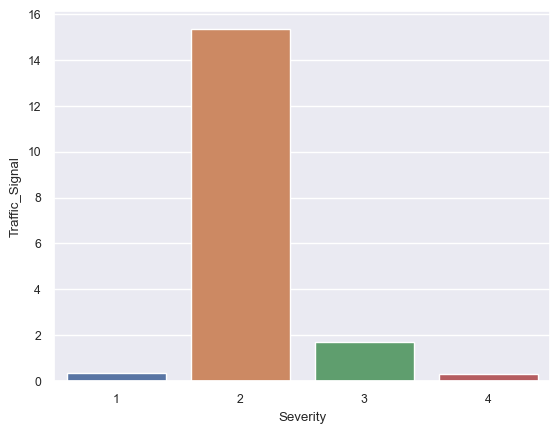

In [258]:
plotdf = test[test['Traffic_Signal']].groupby('Severity', as_index=False)['Traffic_Signal'].count()
plotdf['Traffic_Signal'] = plotdf['Traffic_Signal']/len(test)*100
sn.barplot(x='Severity', y='Traffic_Signal', data=plotdf, ci=False)

Totaal plotten

In [259]:
newdf = test
newdf['Traffic_Signal'].sum()/len(df)*100

17.74874723112963

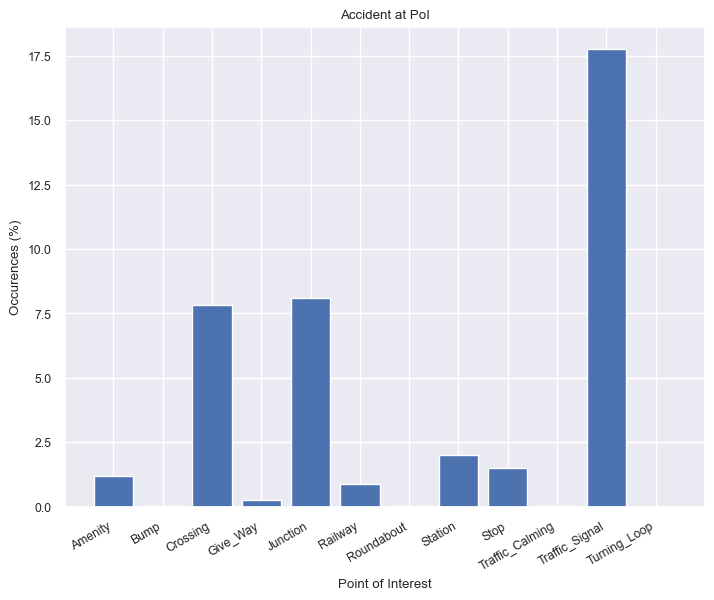

In [260]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
POI = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']
Occurance = [newdf['Amenity'].sum()/len(df)*100,newdf['Bump'].sum()/len(df)*100,newdf['Crossing'].sum()/len(df)*100,newdf['Give_Way'].sum()/len(df)*100,newdf['Junction'].sum()/len(df)*100,newdf['Railway'].sum()/len(df)*100,newdf['Roundabout'].sum()/len(df)*100,newdf['Station'].sum()/len(df)*100,newdf['Stop'].sum()/len(df)*100,newdf['Traffic_Calming'].sum()/len(df)*100,newdf['Traffic_Signal'].sum()/len(df)*100,newdf['Turning_Loop'].sum()/len(df)*100]
ax.bar(POI,Occurance)
plt.xticks(rotation=30, ha='right')
ax.set_title("Accident at PoI")
ax.set_xlabel("Point of Interest")
ax.set_ylabel("Occurences (%)")
plt.show()

In [250]:
test3 = test
test3['Sev_Junction'] = np.where(test3['Junction'] == True, test3['Severity'], test3['Junction'])
test3[['Severity', 'Junction', 'Sev_Junction']].head()

,Severity,Junction,Sev_Junction
0,3,False,0
1,2,False,0
2,2,False,0
3,3,False,0
4,2,False,0


In [251]:
test3.Junction.head(5)

0    False
1    False
2    False
3    False
4    False
Name: Junction, dtype: bool

In [252]:
test4 = test
test4 = test4.loc[newdf['Junction'] == 1]
test4['Junction']
#newdf = newdf[['Severity', 'Junction']].head()

11         True
37         True
43         True
84         True
87         True
           ... 
3513601    True
3513602    True
3513605    True
3513609    True
3513614    True
Name: Junction, Length: 284449, dtype: bool

In [253]:
test4.groupby('Severity', as_index=False)['Junction'].mean()

,Severity,Junction
0,1,1.0
1,2,1.0
2,3,1.0
3,4,1.0


Aantal ongelukken per locatie

In [6]:
locationdf = df

In [7]:
locationdf.Timezone.unique()

array(['US/Eastern', 'US/Pacific', nan, 'US/Central', 'US/Mountain'],
      dtype=object)

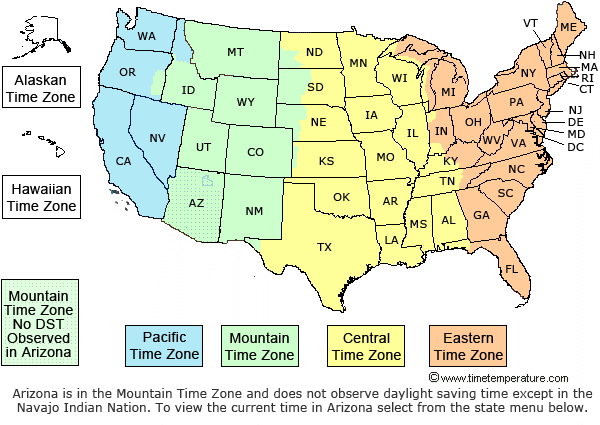

In [8]:
locationdf.groupby('Timezone')['Timezone'].count()

Timezone
US/Central      837122
US/Eastern     1484854
US/Mountain     200902
US/Pacific      986859
Name: Timezone, dtype: int64

In [10]:
locationdf.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [13]:
amountCentral = locationdf['Timezone'].loc[locationdf['Timezone'] == 'US/Central'].count()
amountEastern = locationdf['Timezone'].loc[locationdf['Timezone'] == 'US/Eastern'].count()
amountMountain = locationdf['Timezone'].loc[locationdf['Timezone'] == 'US/Mountain'].count()
amountPacific = locationdf['Timezone'].loc[locationdf['Timezone'] == 'US/Pacific'].count()
print(amountCentral, amountEastern, amountMountain, amountPacific)

837122 1484854 200902 986859


In [17]:
percentageCentral = locationdf['Timezone'].loc[locationdf['Timezone'] == 'US/Central'].count()/len(locationdf)*100
percentageEastern = locationdf['Timezone'].loc[locationdf['Timezone'] == 'US/Eastern'].count()/len(locationdf)*100
percentageMountain = locationdf['Timezone'].loc[locationdf['Timezone'] == 'US/Mountain'].count()/len(locationdf)*100
percentagePacific = locationdf['Timezone'].loc[locationdf['Timezone'] == 'US/Pacific'].count()/len(locationdf)*100
print(percentageCentral, percentageEastern, percentageMountain, percentagePacific)

23.825078259810333 42.25998451168696 5.7178115884571366 28.08669812332989


NaN?

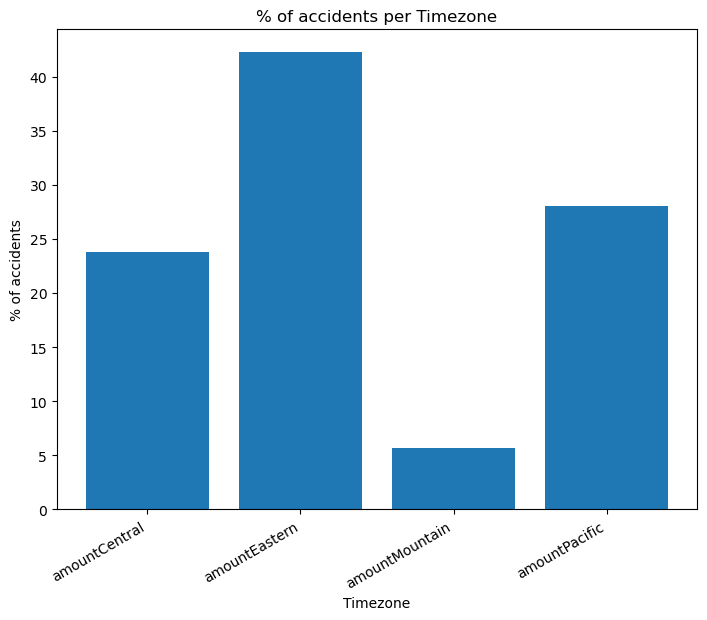

In [19]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
POI = ['amountCentral', 'amountEastern', 'amountMountain', 'amountPacific']
Occurance = [percentageCentral, percentageEastern, percentageMountain, percentagePacific]
ax.bar(POI,Occurance)
plt.xticks(rotation=30, ha='right')
ax.set_title("% of accidents per Timezone")
ax.set_xlabel("Timezone")
ax.set_ylabel("% of accidents")
plt.show()